<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Information-Extraction---Part-2" data-toc-modified-id="Information-Extraction---Part-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Information Extraction - Part 2</a></span><ul class="toc-item"><li><span><a href="#Installations" data-toc-modified-id="Installations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installations</a></span></li><li><span><a href="#Named-Entity-Recognition-(NER)-Using-spacy" data-toc-modified-id="Named-Entity-Recognition-(NER)-Using-spacy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Named Entity Recognition (NER) Using spacy</a></span><ul class="toc-item"><li><span><a href="#Building-a-NER-System" data-toc-modified-id="Building-a-NER-System-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Building a NER System</a></span><ul class="toc-item"><li><span><a href="#Simple-Approach" data-toc-modified-id="Simple-Approach-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Simple Approach</a></span></li><li><span><a href="#Rule-Based-NER" data-toc-modified-id="Rule-Based-NER-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Rule Based NER</a></span></li><li><span><a href="#ML-based-NER" data-toc-modified-id="ML-based-NER-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>ML based NER</a></span></li><li><span><a href="#Conditional-random-fields-(CRFs)-using-CONLL-03-dataset" data-toc-modified-id="Conditional-random-fields-(CRFs)-using-CONLL-03-dataset-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Conditional random fields (CRFs) using CONLL-03 dataset</a></span></li></ul></li></ul></li><li><span><a href="#Named-Entity-Disambiguation-and-Linking" data-toc-modified-id="Named-Entity-Disambiguation-and-Linking-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Named Entity Disambiguation and Linking</a></span><ul class="toc-item"><li><span><a href="#NEL-Using-Spacy" data-toc-modified-id="NEL-Using-Spacy-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>NEL Using Spacy</a></span></li></ul></li><li><span><a href="#Relationship-Extraction-using-spacy" data-toc-modified-id="Relationship-Extraction-using-spacy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Relationship Extraction using spacy</a></span></li></ul></li></ul></div>

# Information Extraction - Part 2

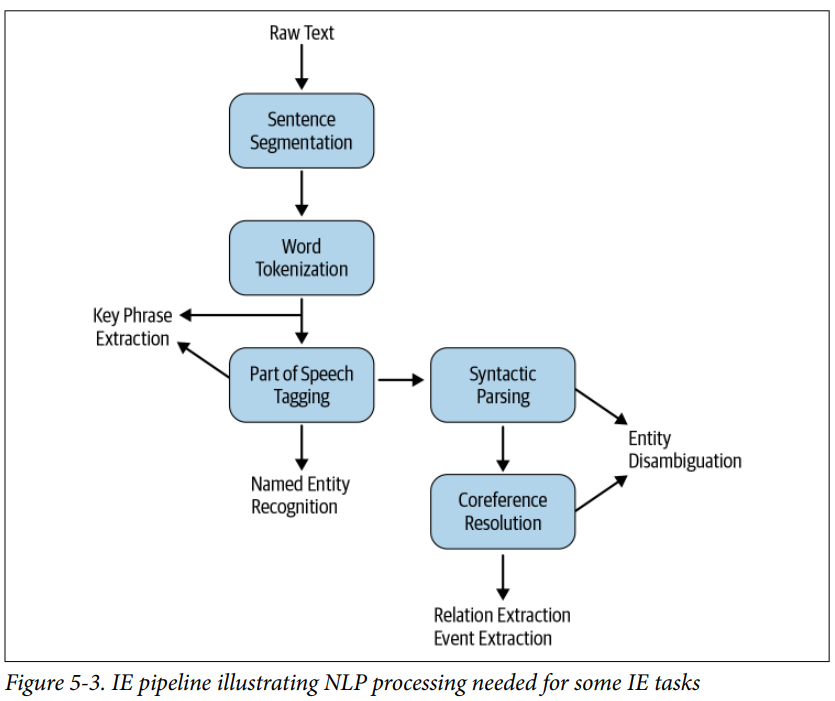

## Installations

In [8]:
# !python -m spacy download en_core_web_lg
#!pip install pytorch-pretrained-bert==0.4.0

## Named Entity Recognition (NER) Using spacy

In [2]:
import spacy

# Load Spacy model
model = spacy.load("en_core_web_lg")
print(type(model))


# Input text
mytext = """SAN FRANCISCO — Shortly after Apple used a new tax law last year to bring back most of the $252 billion it 
            had held abroad, the company said it would buy back $100 billion of its stock.
            On Tuesday, Apple announced its plans for another major chunk of the money: It will buy back a further
            $75 billion in stock. “Our first priority is always looking after the business and making sure we continue 
            to grow and invest,” Luca Maestri, Apple’s finance chief, said in an interview. “If there is excess cash, 
            then obviously we want to return it to investors.”Apple’s record buybacks should be welcome news to shareholders, as the stock price is likely to climb. But the buybacks could also expose the company to more criticism that the tax cuts it received have mostly benefited investors and executives.
"""


doc = model(mytext)
print(type(doc))

for entity in doc.ents:
    print(entity.text, "\t", entity.label_)

<class 'spacy.lang.en.English'>
<class 'spacy.tokens.doc.Doc'>
SAN FRANCISCO 	 GPE
Apple 	 ORG
last year 	 DATE
$252 billion 	 MONEY
$100 billion 	 MONEY
Tuesday 	 DATE
Apple 	 ORG
$75 billion 	 MONEY
first 	 ORDINAL
Luca Maestri 	 PERSON
Apple 	 ORG
”Apple 	 ORG


### Building a NER System

#### Simple Approach 

- A simple approach to building an NER system is to maintain a large collection of person/organization/location names that are the most relevant to our company (e.g.,names of all clients, cities in their addresses, etc.); this is typically referred to as a <font color = 'red'><b>gazetteer</b></font>. 

- To check whether a given word is a named entity or not, just do a <font color = 'red'><b>lookup</b></font> in the gazetteer.

- If a large number of entities present in our data are covered by a gazetteer, then it’s a great way to start, especially when we don’t have an existing NER system available. 

- There are a few questions to consider with such an approach. How does it deal with new names? How do we periodically update this database? How does it keep track of aliases, i.e., different variations of a given name (e.g., USA, United States, etc.)?

#### Rule Based NER 

- An approach that goes beyond a lookup table is rule-based NER, which can be based on a compiled list of patterns based on word tokens and POS tags. 

- For example, a pattern “NNP was born,” where “NNP” is the POS tag for a proper noun, indicates
that the word that was tagged “NNP” refers to a person. 

- Such rules can be programmed to cover as many cases as possible to build a rule-based NER system. 

- The following references, provide functionalities to implement your own rule-based NER:

    - Stanford NLP’s RegexNER: https://nlp.stanford.edu/software/regexner.html
    - and spaCy’s EntityRuler https://spacy.io/usage/rule-based-matching#entityruler 


In [3]:
# if this code gives you AttributeError: module 'lib' has no attribute 'OpenSSL_add_all_algorithms'
# Intsall the following: pip install cryptography==38.0.4
from spacy.lang.en import English

nlp = English()
ruler = nlp.add_pipe("entity_ruler")

print(type(ruler))

# GPE stands for geopolitical entity
patterns = [{"label": "ORG", "pattern": "Apple"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}]
ruler.add_patterns(patterns)

doc = nlp("Apple is opening its first big office in San Francisco.")
print([(ent.text, ent.label_) for ent in doc.ents])

<class 'spacy.pipeline.entityruler.EntityRuler'>
[('Apple', 'ORG'), ('San Francisco', 'GPE')]


In [4]:
from spacy.lang.en import English

nlp = English()
ruler = nlp.add_pipe("entity_ruler")
patterns = [{"label": "ORG", "pattern": "Apple"},
            {"label": "GPE", "pattern": [{"ORTH": "san"}, {"ORTH": "Francisco"}]}]
ruler.add_patterns(patterns)

doc = nlp("Apple is opening its first big office in San Francisco.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('Apple', 'ORG')]


In [5]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# Adding custom entity patterns
ruler = nlp.add_pipe("entity_ruler")
#ruler = nlp.add_pipe("entity_ruler", config={"validate": True})


patterns = [{"label": "PERSON", "pattern": [{"LOWER": "atef"}]}]

ruler.add_patterns(patterns)

# Processing the text
doc = nlp("Apple is opening its first big office in San Francisco. atef")
print([(ent.text, ent.label_) for ent in doc.ents])

# Visualize the named entities
displacy.render(doc, style="ent", jupyter=True)

[('Apple', 'ORG'), ('first', 'ORDINAL'), ('San Francisco', 'GPE'), ('atef', 'PERSON')]


#### ML based NER

A more practical approach to NER is to train an ML model, which can predict the
named entities in unseen text. For each word, a decision has to be made whether or
not that word is an entity, and if it is, what type of the entity it is.

- The  difference between a normal classifier and a sequence classifier, consider the following sentence: <b> “Washington is a rainy state.” </b>
- <b> Conditional random fields (CRFs) </b>: is one of the popular sequence classifier training algorithms. 


####  Conditional random fields (CRFs) using CONLL-03 dataset

The steps are the same as those for the text classifiers:
1. Load the dataset
2. Extract the features
3. Train the classifier
4. Evaluate it on a test set

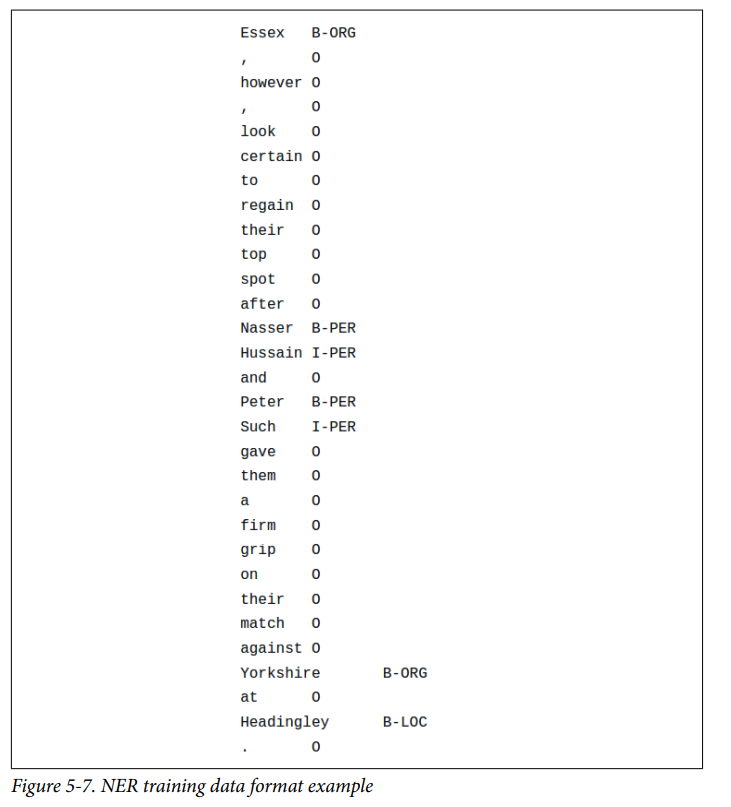

- O means the word doesn’t correspond to any entity.
- B-PER/I-PER means the word corresponds to the beginning of/is inside a person entity.
- B-ORG/I-ORG means the word corresponds to the beginning of/is inside an organization entity.
- B-LOC/I-LOC means the word corresponds to the beginning of/is inside a location entity.
- B-MISC/I-MISC means the word corresponds to the beginning of/is inside a miscellaneous entity.

In [11]:
#Implementaion will be in the next lab,

## Named Entity Disambiguation and Linking

Consider this sentence: <b>“Lincoln drives a Lincoln Aviator and lives on
Lincoln Way.”</b>
All three mentions of “Lincoln” here refer to different entities and dif‐
ferent types of entities: the first Lincoln is a person, the second one is a vehicle, and
the third is a location.

Named entity disambiguation (NED) refers to the NLP task of achieving exactly this:
assigning a unique identity to entities mentioned in the text. It’s also the first step in
moving toward more sophisticated tasks to address the scenario mentioned above by
identifying relationships between entities. NER and NED together are known as
named entity linking (NEL). 

### NEL Using Spacy

In [6]:
import spacy
from spacy import displacy
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Example text
text = ''''Anwar El Sadat was the third President of Egypt. He served from 1970 until his assassination in 1981. 
            Sadat played a significant role in the peace negotiations with Israel.'''

# Process the text
doc = nlp(text)

# Perform named entity recognition (NER)
entities = []
for ent in doc.ents:
    entities.append((ent.text, ent.label_))

print("Named Entities:")
print(entities)

# Visualize the named entities
displacy.render(doc, style="ent", jupyter=True)

# Entity linking 
knowledge_base = {
    "Anwar El Sadat": "https://en.wikipedia.org/wiki/Anwar_Sadat",
    "Egypt": "https://en.wikipedia.org/wiki/Egypt",
    "Israel": "https://en.wikipedia.org/wiki/Israel"
}

linked_entities = []
for ent in doc.ents:
    if ent.text in knowledge_base:
        linked_entities.append((ent.text, knowledge_base[ent.text]))
    else:cla
        linked_entities.append((ent.text, "Not linked"))

print("Linked Entities:")
print(linked_entities)

Named Entities:
[('Anwar El Sadat', 'PERSON'), ('third', 'ORDINAL'), ('Egypt', 'GPE'), ('1970', 'DATE'), ('1981', 'DATE'), ('Israel', 'GPE')]


Linked Entities:
[('Anwar El Sadat', 'https://en.wikipedia.org/wiki/Anwar_Sadat'), ('third', 'Not linked'), ('Egypt', 'https://en.wikipedia.org/wiki/Egypt'), ('1970', 'Not linked'), ('1981', 'Not linked'), ('Israel', 'https://en.wikipedia.org/wiki/Israel')]


In [7]:
import spacy
from spacy import displacy

# Load the spaCy model with named entity recognition
nlp = spacy.load("en_core_web_sm")

# Define a sample sentence
txt = ''''Anwar El Sadat was the third President of Egypt. He served from 1970 until his assassination in 1981. 
            Sadat played a significant role in the peace negotiations with Israel.'''

# Perform named entity recognition (NER)
# Perform named entity recognition (NER)
entities = []
for ent in doc.ents:
    entities.append((ent.text, ent.label_))

print("Named Entities:")
print(entities)

# Visualize the named entities
displacy.render(doc, style="ent", jupyter=True)

# Iterate over the entities in the document
for entity in doc.ents:
    wiki_link = "https://en.wikipedia.org/wiki/{}".format(entity.text.replace(" ", "_"))
    print("Link:", wiki_link)


Named Entities:
[('Anwar El Sadat', 'PERSON'), ('third', 'ORDINAL'), ('Egypt', 'GPE'), ('1970', 'DATE'), ('1981', 'DATE'), ('Israel', 'GPE')]


Link: https://en.wikipedia.org/wiki/Anwar_El_Sadat
Link: https://en.wikipedia.org/wiki/third
Link: https://en.wikipedia.org/wiki/Egypt
Link: https://en.wikipedia.org/wiki/1970
Link: https://en.wikipedia.org/wiki/1981
Link: https://en.wikipedia.org/wiki/Israel


## Relationship Extraction using spacy

In [12]:
import spacy

nlp = spacy.load('en_core_web_sm')

text = "Apple Inc. is planning to open a new store in New York City. The store will offer a wide range of products including iPhones and MacBooks."

doc = nlp(text)

entities = [(ent.text, ent.label_) for ent in doc.ents]

relationships = []
for token in doc:
    if token.dep_ == 'ROOT':
        relationships.append((token.head.text, token.text, token.dep_))

print("Entities:", entities)
print("Relationships:", relationships)


Entities: [('Apple Inc.', 'ORG'), ('New York City', 'GPE'), ('iPhones', 'ORG'), ('MacBooks', 'ORG')]
Relationships: [('planning', 'planning', 'ROOT'), ('offer', 'offer', 'ROOT')]
